## The European Soccer Database contains data on more than 25.000 national football matches from the best European leagues. The aim of this exercise is to present interesting relationships in python using explorative data analysis and visualization.

In [105]:
import sqlite3
import pandas as pd
from plotnine import *
import numpy as np
import datetime


In [106]:
#connecting to database sqlite file. checking the content of the database;the tables.
conn  = sqlite3.connect("EuropeanSoccer.sqlite")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
record = cursor.fetchall()

record

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',),
 ('Match',)]

In [107]:

match_table = pd.read_sql_query("SELECT * from Match;", conn)
match_table

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_possession,away_team_possession,no_cards
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.50,1.78,3.25,4.0,1.73,3.40,4.20,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.0,1.91,3.25,3.60,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.65,2.50,3.20,2.0,2.30,3.20,2.75,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,6.50,1.50,3.75,5.0,1.44,3.75,6.50,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.65,4.50,3.50,1.0,4.75,3.30,1.67,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
countries = pd.read_sql_query("SELECT * from Country where name in ('England' ,'Germany','Spain','Italy')", conn)
countries

,id,name
0,1729,England
1,7809,Germany
2,10257,Italy
3,21518,Spain


In [109]:
league = pd.read_sql_query("SELECT * from League;", conn)
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [110]:
#inner joining the counties table and the leagues table

countries_league = countries.merge(league, how='inner',left_on='id',right_on='id')
countries_league

,id,name_x,country_id,name_y
0,1729,England,1729,England Premier League
1,7809,Germany,7809,Germany 1. Bundesliga
2,10257,Italy,10257,Italy Serie A
3,21518,Spain,21518,Spain LIGA BBVA


In [111]:
#inner joining the three tables(matches, leagues, countries)

countries_league_matches = countries_league.merge(match_table, how='inner',left_on='country_id',right_on='country_id')
countries_league_matches["total_goals"] = countries_league_matches["home_team_goal"]+countries_league_matches["away_team_goal"]

In [112]:
league_goals = countries_league_matches[['name_y','total_goals']]

league_goals

,name_y,total_goals
0,England Premier League,2
1,England Premier League,1
2,England Premier League,1
3,England Premier League,3
4,England Premier League,6
...,...,...
11540,Spain LIGA BBVA,3
11541,Spain LIGA BBVA,2
11542,Spain LIGA BBVA,3
11543,Spain LIGA BBVA,2


## a) In which of the four leagues do on average score the most or the fewest goals per game?

In [113]:
league_goals.groupby(['name_y']).mean()


,total_goals
name_y,
England Premier League,2.710526
Germany 1. Bundesliga,2.901552
Italy Serie A,2.616838
Spain LIGA BBVA,2.767105


## --------------------------------------------------------------------------------------

## b) Compare the average, median, standard deviation, variance, range and interquartile distance of goals scored per match between the four most attractive European leagues and the remaining leagues.

In [114]:
#for the attractive european leagues

average = league_goals['total_goals'].mean()
standard_dev= league_goals['total_goals'].std()
median = league_goals['total_goals'].median()
variance = league_goals['total_goals'].var()
min_val = league_goals['total_goals'].min()
max_val = league_goals['total_goals'].max()
# Computing IQR
Q1 = league_goals['total_goals'].quantile(0.25)
Q3 = league_goals['total_goals'].quantile(0.75)
IQR = Q3 - Q1

dict_df = {"average":average, "standard dev": standard_dev,"median":median,"variance":variance,"minval":min_val,
          "maxval":max_val,"IQR":IQR}

df_result = pd.DataFrame(dict_df,index=[0])
df_result

,average,standard dev,median,variance,minval,maxval,IQR
0,2.741447,1.694361,3.0,2.870861,0,12,2.0


# 2. Is there really a home advantage? Use a box plot to show the number of goals scored by home and away teams.

In [115]:
new_exp = countries_league_matches[['home_team_goal', 'away_team_goal', 'name_y']].copy()
new_exp['home']='home'
new_exp['away']='away'
new_exp['randNumCol'] = np.random.randint(1, 6, new_exp.shape[0])

new_exp


,home_team_goal,away_team_goal,name_y,home,away,randNumCol
0,1,1,England Premier League,home,away,2
1,1,0,England Premier League,home,away,5
2,0,1,England Premier League,home,away,3
3,2,1,England Premier League,home,away,4
4,4,2,England Premier League,home,away,2
...,...,...,...,...,...,...
11540,2,1,Spain LIGA BBVA,home,away,1
11541,2,0,Spain LIGA BBVA,home,away,4
11542,3,0,Spain LIGA BBVA,home,away,2
11543,1,1,Spain LIGA BBVA,home,away,1


array([<AxesSubplot:title={'center':'home_team_goal'}, xlabel='[home, away]'>,
       <AxesSubplot:title={'center':'away_team_goal'}, xlabel='[home, away]'>],
      dtype=object)

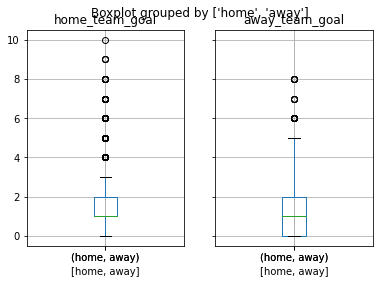

In [116]:
new_exp.boxplot(by =['home','away'], column =['home_team_goal','away_team_goal'], grid = True)


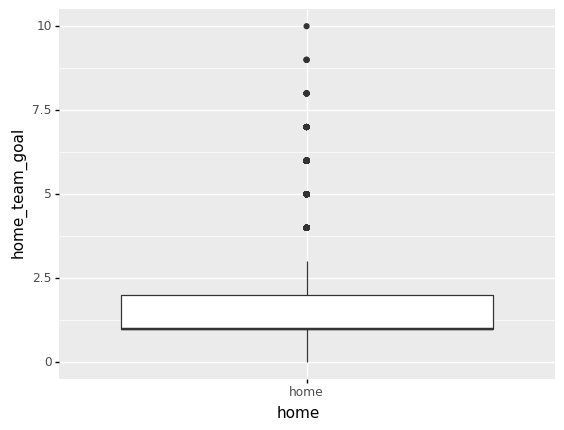

<ggplot: (151771552765)>

In [117]:
(
ggplot(new_exp, aes(x='home', y='home_team_goal'))+
        geom_boxplot()
)



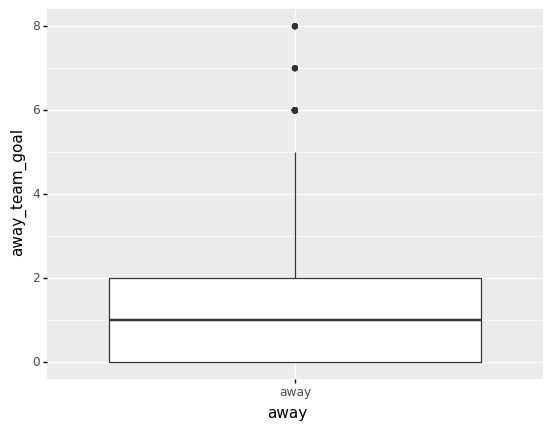

<ggplot: (151770998562)>

In [118]:
(
ggplot(new_exp, aes(x='away', y='away_team_goal'))+
        geom_boxplot()
)

## 3. “All soccer players are fair-weather players!” Check the assertion with a line chart: Do on average more goals fall per game in the summer months than in the rest of the year?

In [119]:

months =[]
for i in countries_league_matches['date']:
    months.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%b"))
    

countries_league_matches['month'] =  months   
countries_league_matches.sort_values('date')



,id_x,name_x,country_id,name_y,id_y,league_id,season,stage,date,match_api_id,...,GBD,GBA,BSH,BSD,BSA,home_team_possession,away_team_possession,no_cards,total_goals,month
3040,7809,Germany,7809,Germany 1. Bundesliga,7809,7809,2008/2009,1,2008-08-15 00:00:00,499317,...,3.60,5.0,1.53,3.75,5.50,NaN,NaN,5.0,4,Aug
1,1729,England,1729,England Premier League,1730,1729,2008/2009,1,2008-08-16 00:00:00,489043,...,5.50,13.0,1.22,5.00,13.00,66.0,34.0,0.0,1,Aug
2,1729,England,1729,England Premier League,1731,1729,2008/2009,1,2008-08-16 00:00:00,489044,...,3.40,1.0,4.50,3.40,1.73,46.0,54.0,2.0,1,Aug
3,1729,England,1729,England Premier League,1732,1729,2008/2009,1,2008-08-16 00:00:00,489045,...,3.25,4.0,1.91,3.25,3.80,52.0,48.0,3.0,3,Aug
3042,7809,Germany,7809,Germany 1. Bundesliga,7811,7809,2008/2009,1,2008-08-16 00:00:00,499319,...,3.60,5.0,1.57,3.75,5.00,NaN,NaN,3.0,3,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8444,10257,Italy,10257,Italy Serie A,13213,10257,2015/2016,38,2016-05-15 00:00:00,2060645,...,NaN,NaN,NaN,NaN,NaN,48.0,52.0,3.0,3,May
11478,21518,Spain,21518,Spain LIGA BBVA,24491,21518,2015/2016,38,2016-05-15 00:00:00,2030531,...,NaN,NaN,NaN,NaN,NaN,60.0,40.0,10.0,3,May
11477,21518,Spain,21518,Spain LIGA BBVA,24490,21518,2015/2016,38,2016-05-15 00:00:00,2030530,...,NaN,NaN,NaN,NaN,NaN,52.0,48.0,3.0,2,May
2972,1729,England,1729,England Premier League,4701,1729,2015/2016,38,2016-05-15 00:00:00,1987599,...,NaN,NaN,NaN,NaN,NaN,47.0,53.0,0.0,3,May


In [120]:
new_exp2 = countries_league_matches[['month','total_goals']].copy()

newnew = new_exp2.groupby(['month'],as_index = False).mean()
newnew


,month,total_goals
0,Apr,2.775668
1,Aug,2.635542
2,Dec,2.731394
3,Feb,2.644216
4,Jan,2.716753
5,Jun,3.800000
6,Mar,2.684169
7,May,2.931401
8,Nov,2.759184
9,Oct,2.750000


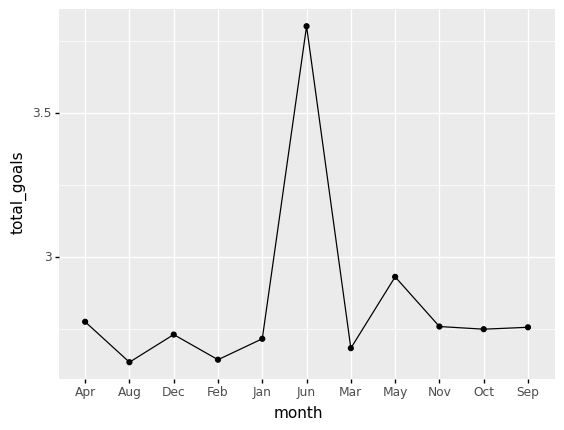

<ggplot: (151748588864)>

In [121]:
(
ggplot(newnew, aes(x='month', y='total_goals',group=1))+
        geom_point()+geom_line()
)

## 4. Display the average goals scored per game for the top 4 leagues per year from 2008 to 2016

In [122]:
years = []
for i in countries_league_matches['date']:
    years.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").year)

    
    
countries_league_matches['years'] = years

countries_league_matches.sort_values('years')



,id_x,name_x,country_id,name_y,id_y,league_id,season,stage,date,match_api_id,...,GBA,BSH,BSD,BSA,home_team_possession,away_team_possession,no_cards,total_goals,month,years
0,1729,England,1729,England Premier League,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,...,10.0,1.29,4.50,11.00,55.0,45.0,3.0,2,Aug,2008
5833,10257,Italy,10257,Italy Serie A,10602,10257,2008/2009,6,2008-10-05 00:00:00,539608,...,6.0,1.44,3.60,7.00,46.0,54.0,6.0,3,Oct,2008
5832,10257,Italy,10257,Italy Serie A,10601,10257,2008/2009,6,2008-10-04 00:00:00,539607,...,7.0,1.44,3.60,7.00,NaN,NaN,7.0,2,Oct,2008
5831,10257,Italy,10257,Italy Serie A,10600,10257,2008/2009,6,2008-10-05 00:00:00,539606,...,1.0,7.00,3.75,1.44,32.0,68.0,6.0,0,Oct,2008
5830,10257,Italy,10257,Italy Serie A,10599,10257,2008/2009,6,2008-10-05 00:00:00,539605,...,3.0,2.30,2.80,3.10,NaN,NaN,7.0,2,Oct,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,1729,England,1729,England Premier League,4536,1729,2015/2016,22,2016-01-17 00:00:00,1988927,...,NaN,NaN,NaN,NaN,45.0,55.0,0.0,0,Jan,2016
2806,1729,England,1729,England Premier League,4535,1729,2015/2016,22,2016-01-16 00:00:00,1988926,...,NaN,NaN,NaN,NaN,57.0,43.0,0.0,3,Jan,2016
2805,1729,England,1729,England Premier League,4534,1729,2015/2016,22,2016-01-16 00:00:00,1988925,...,NaN,NaN,NaN,NaN,49.0,51.0,1.0,3,Jan,2016
8342,10257,Italy,10257,Italy Serie A,13111,10257,2015/2016,29,2016-03-12 00:00:00,2060461,...,NaN,NaN,NaN,NaN,60.0,40.0,5.0,2,Mar,2016


In [123]:
question4 = countries_league_matches[['name_y','years','total_goals']]
question4_new = question4.groupby(['name_y','years'],as_index = False).mean()
question4_new

,name_y,years,total_goals
0,England Premier League,2008,2.585859
1,England Premier League,2009,2.650794
2,England Premier League,2010,2.647059
3,England Premier League,2011,2.883289
4,England Premier League,2012,2.813299
5,England Premier League,2013,2.701613
6,England Premier League,2014,2.723684
7,England Premier League,2015,2.571053
8,England Premier League,2016,2.800000
9,Germany 1. Bundesliga,2008,3.019608


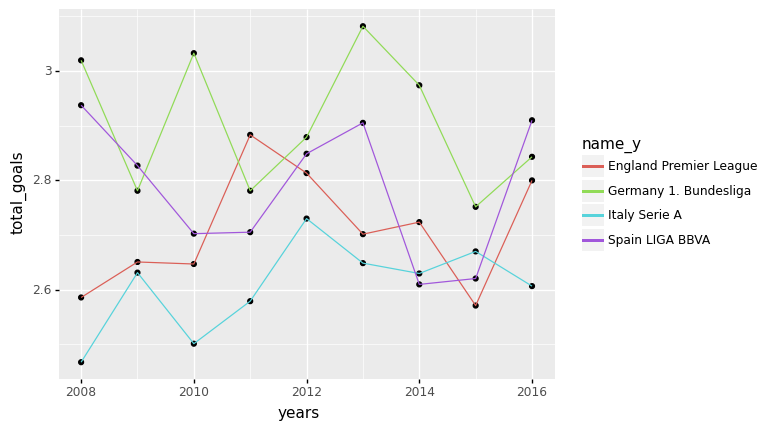

<ggplot: (151771033670)>

In [124]:
(
ggplot(question4_new, aes(x='years', y='total_goals'))+
        geom_point()+geom_line(aes(color = 'name_y'))
)

## 5. Use an estimated density function curve AND a QQ-Plots to check whether the home_team_possession variable is (approximately) normally distributed.

D:\anaconda installation\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_density : Removed 4231 rows containing non-finite values.


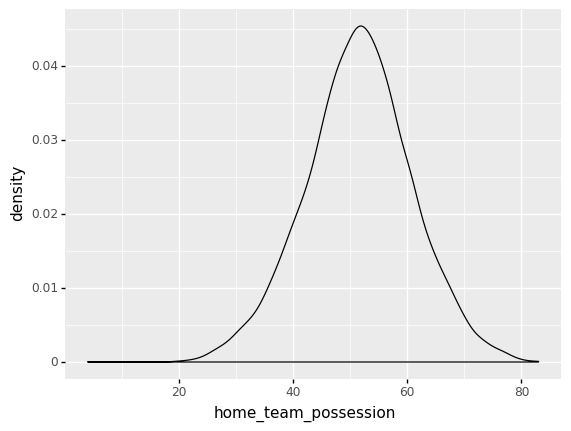

<ggplot: (151771519377)>

In [125]:
(
ggplot(countries_league_matches, aes(x = 'home_team_possession' ))+
    geom_density()

)


In [126]:
home_team_posession = countries_league_matches[['home_team_possession']].copy()

new_home_team_posession = home_team_posession.sort_values(by=['home_team_possession'],ascending=True).reset_index()

new_home_team_posession['count']  = new_home_team_posession.index+1

new_home_team_posession

,index,home_team_possession,count
0,88,4.0,1
1,5260,20.0,2
2,2559,20.0,3
3,3917,22.0,4
4,10912,22.0,5
...,...,...,...
11540,10780,NaN,11541
11541,10781,NaN,11542
11542,10782,NaN,11543
11543,10783,NaN,11544


In [127]:
n_rows = new_home_team_posession.shape[0]

In [128]:
new_home_team_posession['percentile_area'] = (new_home_team_posession['count'])/n_rows

In [129]:
from scipy.special import ndtri

new_home_team_posession['z-theritical'] = ndtri(new_home_team_posession['percentile_area'])

In [130]:
new_home_team_posession['actual'] = (new_home_team_posession['home_team_possession']-new_home_team_posession['home_team_possession'].mean())/new_home_team_posession['home_team_possession'].std(ddof=0)

In [131]:
new_home_team_posession.head()

,index,home_team_possession,count,percentile_area,z-theritical,actual
0,88,4.0,1,0.000087,-3.755154,-5.086583
1,5260,20.0,2,0.000173,-3.577821,-3.372127
2,2559,20.0,3,0.000260,-3.470389,-3.372127
3,3917,22.0,4,0.000346,-3.392357,-3.157820
4,10912,22.0,5,0.000433,-3.330733,-3.157820


In [132]:
(
ggplot(new_home_team_posession, aes(x = 'actual' ))+
    geom_qq(sample = 0.001, x = after_stat('z-theritical'))

)

TypeError: float() argument must be a string or a number, not 'stage'

## 6. Use a box plot to show whether there is a correlation between ball ownership (home_team_possession) and the number of goals (home_team_goals) scored per game for home teams. Create four categories of ball ownership shares: very low (≤ 25%), low (25% < x ≤ 50%), high (50% < x ≤ 75%) und very high (x > 75%).

In [140]:
bins = [ 0, 25, 50, 75, 100 ]
labels = ['very low','low','high','very high']
countries_league_matches['bin_cut_manual'] = pd.cut(countries_league_matches['home_team_possession'] , bins=bins, labels=labels, include_lowest=True)
countries_league_matches.dropna(subset=['home_team_goal','home_team_possession'],inplace=True)
question6 = countries_league_matches[['bin_cut_manual','home_team_possession','home_team_goal']]

question6


,bin_cut_manual,home_team_possession,home_team_goal
0,high,55.0,1
1,high,66.0,1
2,low,46.0,0
3,high,52.0,2
4,high,52.0,4
...,...,...,...
11540,low,49.0,2
11541,low,50.0,2
11542,high,52.0,3
11543,low,45.0,1


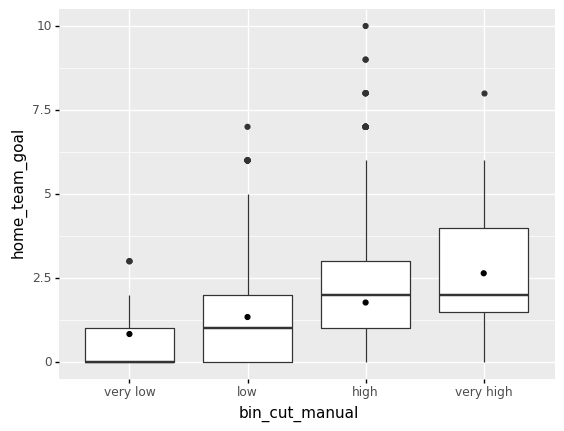

<ggplot: (151674993387)>

In [142]:
(
ggplot(question6, aes(x='bin_cut_manual', y='home_team_goal'))+
        geom_boxplot()+ stat_summary(geom ='point')
)

